# Дослідження методів розрахунку пріоритетів альтернатив рішень на основі нечітких експертних оцінок парних порівнянь

## Варіант 1

**Завдання:**

* Використовуючи метод GPM, розрахувати ваги на основі НМПП та декількох різних функцій приналежності, заданих згідно з варіантом. Використати декомпозиційний підхід. Порівняти результати, отримані при різних функціях приналежності. Чи змінюється ранжування альтернатив рішень при використанні різних функцій приналежності на основі однієї і тієї ж НМПП? Результуючі ваги та ранжування представити графічно залежно від рівня $\alpha$.

* Розглянути чіткі МПП, побудовані на основі заданих НМПП. Розрахувати інтервали [Bel, Pls] для ваг на основі чітких МПП. За інтервалами [Bel,Pls] побудувати ранжування альтернатив. Порівняти з ранжуваннями, отриманими на основі НМПП при різних значеннях рівня $\alpha$.

**Нечіткі матриці парних порівнянь:**

| 1 | 2 | 3 |
| - | - | - |
|<img src="images/lab_3_matrix_1.png" width=200>|<img src="images/lab_3_matrix_2.png" width=200>|<img src="images/lab_3_matrix_3.png" width=200>|

**Функції приналежності**

| Функція приналежності, що відповідає нечіткій фундаментальній шкалі трикутного виду | Функція приналежності, що відповідає нечіткій фундаментальній шкалі трапецевидного виду | Гаусівська ФП |
| - | - | - |
|<img src="images/lab_3_func_1.png" width=256>|<img src="images/lab_3_func_2.png" width=256>| $N(0, 1)$ |

## Теоретичні відомості

***Інтервальною матрицею парних порівнянь (ІМПП)*** називається:

$$A = {(a_{ij}) | a_{ij} = [l_{ij}; u_{ij}], i = 1, \dots, n, j = 1, \dots, n}$$

де $u_{ij} \geq l_{ij} > 0, l_{ij} = \frac{1}{u_{ji}}$ при $i \neq j$ і $a_{ii} = l_{ii} = u_{ii} = 1$.

Задача полягає у розрахунку вектору ваг $w = (w_{i} | i = 1, \dots, n)$ на основі ІМПП.

<img src="images/lab_3_alg.png" width=700>

Декомпозиційне представлення НМПП $A_{k}^{неч}, k = 1, \dots, K$ полягає в її розкладі за множинами рівня $A_{k}(\alpha)$:

$$A_{k}^{неч} = \bigcup_{\alpha \in [0, 1]} \alpha A_{k}(\alpha),   k = 1, \dots, K$$

де $A_{k}(\alpha) = \{(a_{ijk}(\alpha)) | i, j = 1, \dots, N\}$ - матриця множин рівня $\alpha$, 

$a_{ijk}(\alpha) = \{x: \mu_{ijk}(x) \geq \alpha \}, \alpha \in [0, 1]$, $\mu_{ijk}$ - функція приналежності нечіткій множині $a_{ijk}^{неч}, x \in R$

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
import numpy as np
# put the seed for reproducibility
np.random.seed(42)
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import linprog

In [5]:
norm??

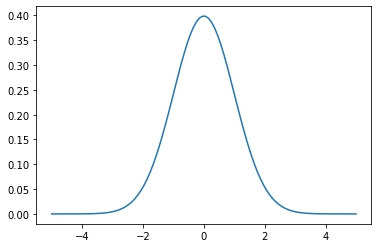

In [8]:
x = np.linspace(-5, 5, 100)
y = norm._pdf(x)
plt.plot(x, y);

## Вхідні дані

Нечіткі матриці парних порвнянь:

In [13]:
# matrices of pair comparisonі
mpc_1 = np.array([[1., 1./3, 1./6, 1./7, 1./9],
                  [3., 1.  , 1./2, 1./2, 3.  ],
                  [6., 2.  , 1.  , 1.  , 1.  ],
                  [7., 2.  , 1.  , 1.  , 1.  ],
                  [9., 1./3, 1.  , 1.  , 1.  ]]);

mpc_2 = np.array([[1.  , 5.  , 2., 3.  , 5.  ],
                  [1./2, 1.  , 3., 3.  , 2.  ],
                  [1./2, 1./3, 1., 1./3, 1./7],
                  [1./3, 1./3, 3., 1.  , 2.  ],
                  [1./5, 1./2, 7., 1./2, 1.  ]]);

mpc_3 = np.array([[1.  , 3.  , 2.  , 1.  , 3.  ],
                  [1./3, 1.  , 2.  , 1./5, 1./2],
                  [1./2, 1./2, 1.  , 1./2, 2.  ],
                  [1.  , 5.  , 2.  , 1.  , 2.  ],
                  [1./3, 2.  , 1./2, 1./2, 1.  ]]);

Функції приналежності:

In [14]:
# membership functions dictionaries:

# triangular membership function
mem_func_1_dict = {
    1: (1, 1, 3),
    2: (1, 2, 4),
    3: (1, 3, 5),
    4: (2, 4, 6),
    5: (3, 5, 7),
    6: (4, 6, 8),
    7: (5, 7, 9),
    8: (6, 8, 9),
    9: (7, 9, 9)
}

# trapezius membership function
mem_func_2_dict = {
    1: (1, 1, 1, 2),
    2: (1, 1.5, 2.5, 3),
    3: (2, 2.5, 3.5, 4),
    4: (3, 3.5, 4.5, 5),
    5: (4, 4.5, 5.5, 6),
    6: (5, 5.5, 6.5, 7),
    7: (6, 6.5, 7.5, 8),
    8: (7, 7.5, 8.5, 9),
    9: (8, 9, 9, 9)
}

In [15]:
# here put actual functions, including the normal one

## GPM

In [17]:
def gpm(L,U):
    n = int(len(L))
    # Create diagonal matrix
    I = np.eye(len(L))
    f = np.zeros(6*n)
    for i in range((2*n),(6*n)):
        f[i] = 1

    A1eq = np.zeros((n,6*n))
    b1eq = np.zeros((n,1))
    A2eq = np.zeros((n, 6 * n))
    b2eq = np.zeros((n,1))

    for i in range(n):
        for j in range(n):
            A1eq[i,j] = -(n-1)*I[i,j]
            A1eq[i,(j+n)] = (L[i][j]-I[i][j])
            A1eq[i,(j+2*n)] = -I[i,j]
            A1eq[i,(j+3*n)] = -I[i,j]

            A2eq[i,j] = (U[i][j]-I[i][j])
            A2eq[i, (j + n)] = -(n - 1) * I[i, j]
            A2eq[i, (j + 4 * n)] = -I[i, j]
            A2eq[i, (j + 5 * n)] = -I[i, j]

    Aeq=np.zeros((2*n,6*n))
    beq=np.zeros(2*n)

    for j in range(6*n):
        for i in range(n):
            Aeq[i,j]=A1eq[i,j]
            Aeq[i+n, j] = A2eq[i, j]

    A1=np.zeros((n,6*n))
    b1=np.ones(n)
    for i in range(n):
        b1[i]=-b1[i]
    A2 = np.zeros((n, 6 * n))
    b2 = np.ones(n)

    E=np.ones((n,n))

    for i in range(n):
        for j in range(n):
            A1[i,j]=-I[i,j]
            A1[i,j+n]=-(E[i,j]-I[i,j])

            A2[i, j] = E[i,j]-I[i, j]
            A2[i, j + n] = I[i, j]

    A3=np.zeros((n,6*n))
    b3=np.zeros(n)

    for i in range(n):
        for j in range(n):
            A3[i,j]=I[i,j]
            A3[i,j+n]=-I[i,j]

    A=np.zeros((3*n,6*n))
    b=np.zeros((3*n, 1))
    for j in range(6*n):
        for i in range(n):
            A[i,j]=A1[i,j]
            A[i+n,j]=A2[i,j]
            A[i+2*n,j]=A3[i,j]

    for i in range(n):
        b[i]=b1[i]
        b[i+n]=b2[i]
        b[i+2*n]=b3[i]

    lb=np.zeros((6*n,1))
    ub=[]

    #[x,fval]=linprog(f,A,b,Aeq,beq,lb,ub)
    res = linprog(f, A_ub=A, b_ub=b, A_eq=Aeq, b_eq=beq, bounds=(0,None),options={"disp": True})

    X = res.x
    # блок вывода

    print("f",f)
    print('A=',A)
    print('b=',b);
    print('Aeq=',Aeq)
    print('beq=', beq)

    #J=fval
    #for i in range(1,n):
       # wL = x[i]
    # i in range (n+1,2*n):
       # wU= x[i]

    wL = np.zeros(n)
    wU = np.zeros(n)
    for i in range(n):
        wL[i] = X[i]
        wU[i] = X[i + n]

    print("X = ")
    print(res.x)
    print("J* = ")
    print(res.fun)
    print("wL = ", end=" ")
    print(wL)
    print("wU = ", end=" ")
    print(wU)

    return {"J*": res.fun, "wL": wL, "wU": wU}